# 1. Import packages

In [14]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
import PyComplexHeatmap
from PyComplexHeatmap import *

# 2. Generate dataset

In [15]:
#Generate example dataset (random)
df = pd.DataFrame(['AAAA1'] * 5 + ['BBBBB2'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

# 3. Test the row / col orders & add selected rows labels

              AB CD EF         F
sample1   AAAA1   C  E  0.299367
sample2   AAAA1   C  E -0.052473
sample3   AAAA1   C  E  0.251179
sample4   AAAA1   D  E -1.175215
sample5   AAAA1   D  E  0.405932
sample6   BBBBB2  D  E -1.341374
sample7   BBBBB2  G  F -1.331531
sample8   BBBBB2  G  F  0.735923
sample9   BBBBB2  G  H -2.465146
sample10  BBBBB2  G  H  0.507949
        sample1   sample2   sample3   sample4   sample5   sample6   sample7  \
Fea1  -0.456760  1.580618 -0.489675  0.095369 -0.158437  1.103190  0.592154   
Fea2  -0.094979  0.138353 NaN        2.213531 -0.961420 -0.386626 -0.960878   
Fea3  -0.952226 -0.530208 -0.194840 -0.493026  0.211169 -0.026778  1.087161   
Fea4  -0.642209 -0.748136  0.129770  0.182437 -0.567871  0.508126  1.380902   
Fea5  -0.760488  0.742710  1.464890 -0.028909  0.373497  0.760429 -0.952305   
...         ...       ...       ...       ...       ...       ...       ...   
Fea26  0.817457  2.207966 -0.180038  0.444098  2.028802 -0.949609 -0.456878   
Fea27

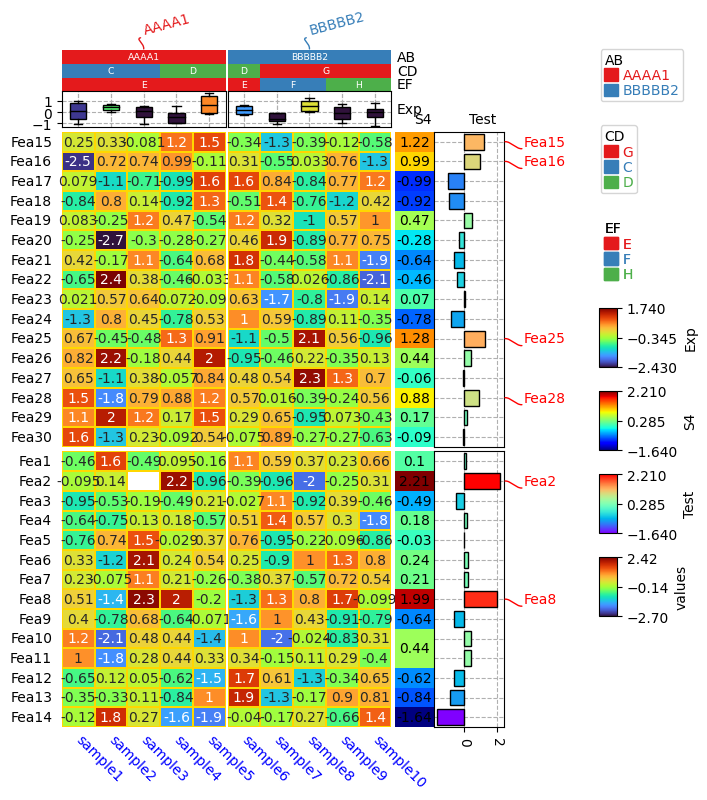

[['Fea15', 'Fea16', 'Fea17', 'Fea18', 'Fea19', 'Fea20', 'Fea21', 'Fea22', 'Fea23', 'Fea24', 'Fea25', 'Fea26', 'Fea27', 'Fea28', 'Fea29', 'Fea30'], ['Fea1', 'Fea2', 'Fea3', 'Fea4', 'Fea5', 'Fea6', 'Fea7', 'Fea8', 'Fea9', 'Fea10', 'Fea11', 'Fea12', 'Fea13', 'Fea14']]
[['sample1', 'sample2', 'sample3', 'sample4', 'sample5'], ['sample6', 'sample7', 'sample8', 'sample9', 'sample10']]


In [16]:
#Annotate the rows with average > 0.3
df_rows = df_heatmap.apply(lambda x:x.name if x.sample4 > 0.5 else None,axis=1)
df_rows=df_rows.to_frame(name='Selected')
df_rows['XY']=df_rows.index.to_series().apply(lambda x:'A' if int(x.replace('Fea',''))>=15 else 'B')

row_ha = HeatmapAnnotation(S4=anno_simple(df_heatmap.sample4.apply(lambda x:round(x,2)),
                                           add_text=True,height=10,
                                           text_kws={'rotation':0,'fontsize':10,'color':'black'}),
                           # Scatter=anno_scatterplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                           #                  height=10),
                           Test=anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                                            height=18,cmap='rainbow'),
                           selected=anno_label(df_rows,colors='red'),
                           axis=0,verbose=0,label_kws={'rotation':0,'horizontalalignment':'left','verticalalignment':'bottom'})

col_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                           AB=anno_simple(df.AB,add_text=True),axis=1,
                           CD=anno_simple(df.CD,add_text=True),
                           EF=anno_simple(df.EF,add_text=True,
                                            legend_kws={'frameon':False}),
                           Exp=anno_boxplot(df_box, cmap='turbo'),
                           verbose=0) #verbose=0 will turn off the log.

print(df)
print(df_heatmap)
plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(data=df_heatmap, top_annotation=col_ha,right_annotation=row_ha,
                       col_split=df.AB,row_split=df_rows.XY, col_split_gap=0.5,row_split_gap=1,
                       col_cluster=False,row_cluster=False,
                       label='values',row_dendrogram=False,show_rownames=True,show_colnames=True,
                         tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=7,
                       annot=True,linewidths=0.05,linecolor='gold',cmap='turbo',
                      xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'})
plt.show()
print(cm.row_order)
print(cm.col_order)

In [17]:
row_ha.annotations[1].df.iloc[:,0].describe()

count    30.000000
mean     0.095000 
std      0.871201 
min     -1.640000 
25%     -0.587500 
50%      0.085000 
75%      0.440000 
max      2.210000 
Name: sample4, dtype: float64

In [18]:
df_rows

,Selected,XY
Fea1,None,B
Fea2,Fea2,B
Fea3,None,B
Fea4,None,B
Fea5,None,B
...,...,...
Fea26,None,A
Fea27,None,A
Fea28,Fea28,A
Fea29,None,A


# 4. Annotations

In [19]:
df = pd.DataFrame(['AAAA1'] * 5 + ['BBBBB2'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar1 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T1-A', 'T1-B'])
df_bar1.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar2 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T2-A', 'T2-B'])
df_bar2.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar3 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T3-A', 'T3-B'])
df_bar3.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar3.iloc[5,0]=np.nan
df_bar4 = pd.DataFrame(np.random.uniform(0, 10, (10, 1)), columns=['T4'])
df_bar4.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar4.iloc[7,0]=np.nan
print(df)
print(df_box)
print(df_scatter)
print(df_bar)
print(df_bar1)
print(df_bar2)
print(df_bar3)
print(df_bar4)

              AB CD         F
sample1   AAAA1   C  0.381385
sample2   AAAA1   C  1.021481
sample3   AAAA1   C  0.961558
sample4   AAAA1   D  1.689047
sample5   AAAA1   D -0.131397
sample6   BBBBB2  D  1.503608
sample7   BBBBB2  G -0.976603
sample8   BBBBB2  G  0.473886
sample9   BBBBB2  G  2.806945
sample10  BBBBB2  G -0.843349
             Gene1     Gene2     Gene3     Gene4
sample1  -1.486999 -1.368126 -0.134294 -0.772700
sample2   0.138914  0.701307  0.687732 -0.328347
sample3  -0.395709  1.304607  0.626011 -0.005954
sample4   0.862664 -1.073861  0.516769  0.404080
sample5   0.796209 -0.071570 -0.799945 -0.030286
sample6  -0.372741 -0.314468  0.562456  1.416955
sample7   0.031781  1.695623  0.208037  1.466644
sample8   0.091779 -0.801812 -0.245217 -0.516463
sample9  -0.509927 -0.656868  0.556737 -0.893318
sample10  1.222950 -1.055742  0.165139  1.330050
           Scatter
sample1   0.517079
sample2   5.213137
sample3   8.653563
sample4   7.960813
sample5   3.934282
sample6   5.62378

Starting plotting HeatmapAnnotations


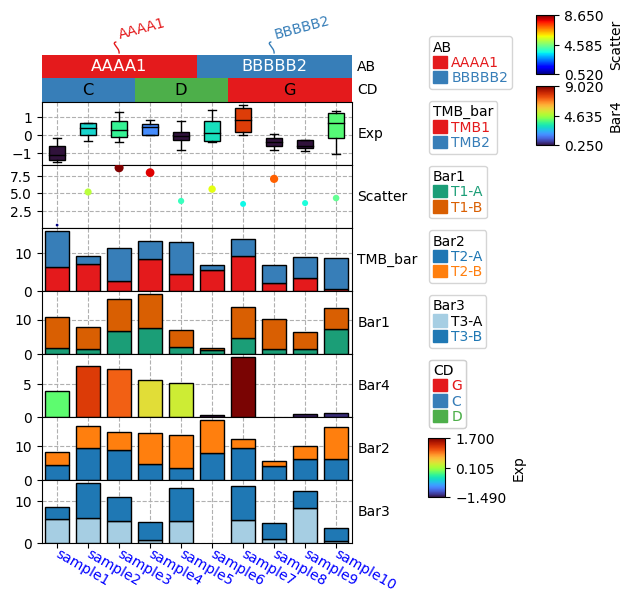

In [20]:
plt.figure(figsize=(4, 6))
col_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                            AB=anno_simple(df.AB,add_text=True,legend=True), axis=1,
                            CD=anno_simple(df.CD, add_text=True,legend=True,text_kws={'color':'black'}),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), 
                           TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
                           Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
                           Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
                           plot=True,legend=True,legend_gap=3)
col_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=-30)
plt.show()

## Change orentation up to down and add extra space

Starting plotting HeatmapAnnotations


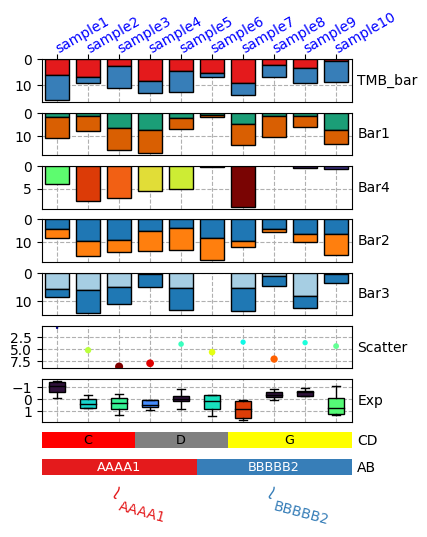

In [21]:
plt.figure(figsize=(4, 6))
row_ha = HeatmapAnnotation(
                           TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
                           Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
                           Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
                            Scatter=anno_scatterplot(df_scatter), 
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            CD=anno_simple(df.CD, colors={'C': 'red', 'D': 'gray', 'G': 'yellow'},
                                           add_text=True,legend=True,text_kws={'color':'black'}),
                            AB=anno_simple(df.AB,add_text=True,legend=True),
                            label=anno_label(df.AB, merge=True,rotation=-15),
                           plot=True,plot_legend=False,legend_hpad=13,axis=1,hspace=0.3
                            )
row_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=30)
plt.show()
# Here, we can use hspace (when axis=1) or wspace (when axis=0) to control the widh of height space between different annotations.

## Change orentation to the left

Starting plotting HeatmapAnnotations
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


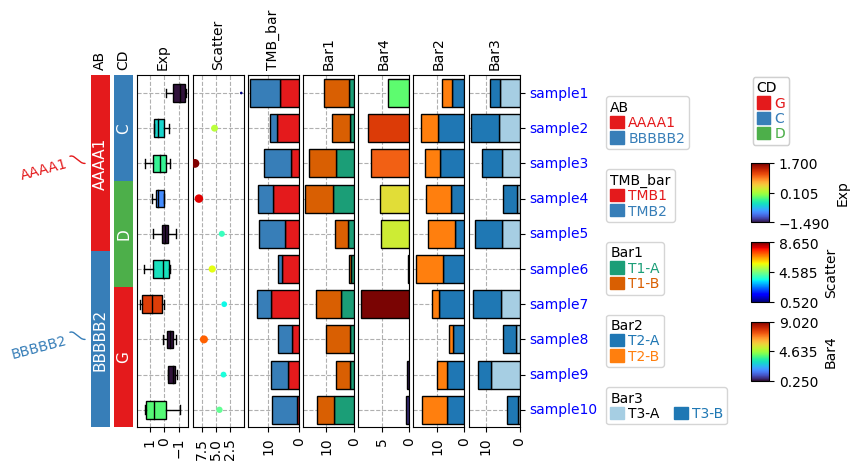

In [22]:
plt.figure(figsize=(6, 4))
row_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                            AB=anno_simple(df.AB,add_text=True,legend=True),
                            CD=anno_simple(df.CD,add_text=True,legend=True),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), 
                           TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
                           Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
                           Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
                           plot=True,legend=True,legend_gap=5,
                           axis=0,wspace=0.1,legend_hpad=20
                            )
row_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=0)
plt.show()

In [23]:
row_ha.axes[0,-1].get_xticklabels()

[Text(0.0, 0, '0'), Text(10.0, 0, '10'), Text(20.0, 0, '20')]

## Change orentation to the right

Starting plotting HeatmapAnnotations
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


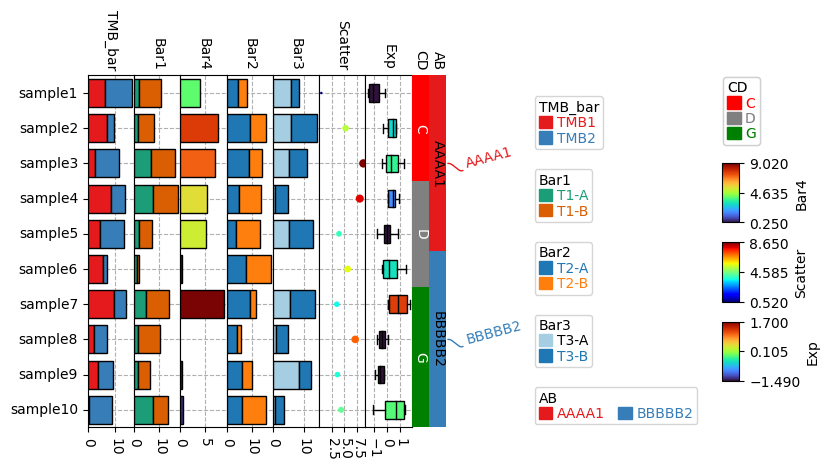

In [24]:
plt.figure(figsize=(5, 4))
row_ha = HeatmapAnnotation(
                           TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
                           Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
                           Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
                            Scatter=anno_scatterplot(df_scatter), 
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            CD=anno_simple(df.CD, colors={'C': 'red', 'D': 'gray', 'G': 'green'},
                                           add_text=True,legend=True,text_kws={'rotation':-90}),
                            AB=anno_simple(df.AB,add_text=True,legend=True,text_kws={'rotation':-90,'color':'black'}),
                            label=anno_label(df.AB, merge=True,rotation=15),
                           plot=True,legend=True,legend_hpad=13,legend_gap=5,axis=0
                            )
row_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'black'},rotation=0)
plt.show()

## Changing orientation using parameter `orientation` 
By Default, if there is no `anno_label` in the annotation, the oriention would be `right` for `axis=0` and `up` for `axis=1`.

Starting plotting HeatmapAnnotations
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


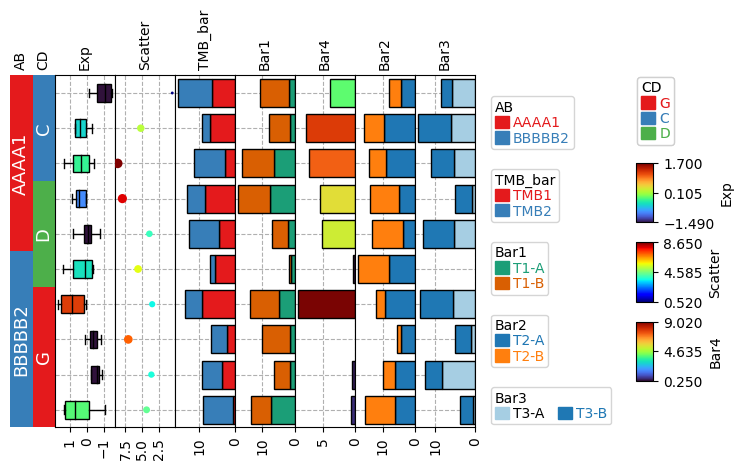

In [25]:
plt.figure(figsize=(6, 4))
col_ha = HeatmapAnnotation(
                            AB=anno_simple(df.AB,add_text=True,legend=True),
                            CD=anno_simple(df.CD,add_text=True,legend=True),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), 
                           TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
                           Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
                           Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
                           plot=True,legend=True,axis=0,
                            legend_gap=5,orientation='left',
                            )
plt.show()